In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
wine_data = pd.read_csv('winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_data.shape

(1599, 12)

In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


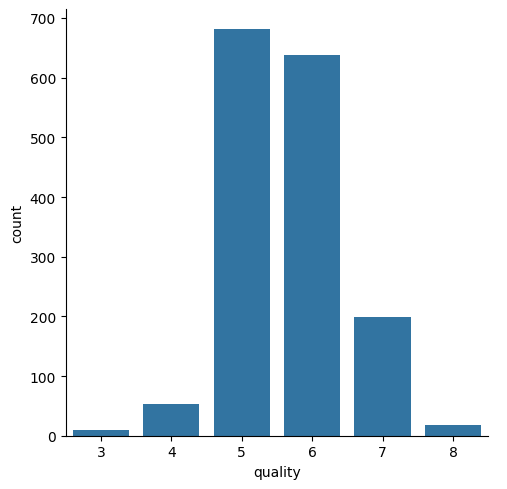

In [8]:
# number of values for each quality 
sns.catplot(x='quality', data=wine_data, kind= 'count')

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

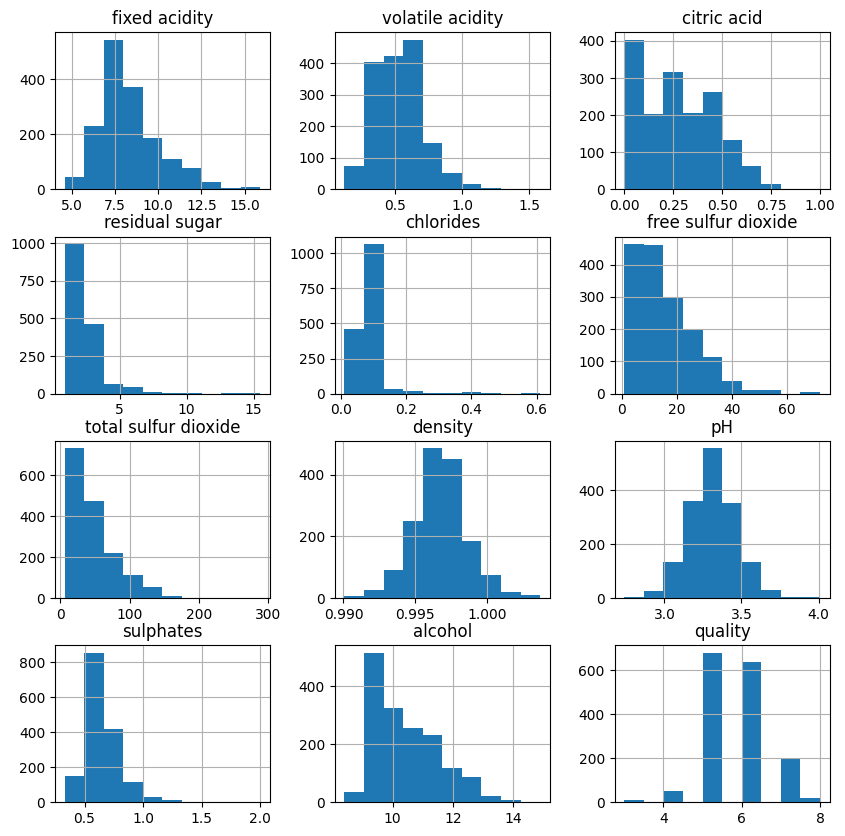

In [10]:
wine_data.hist(figsize=(10,10))

<Axes: xlabel='quality', ylabel='volatile acidity'>

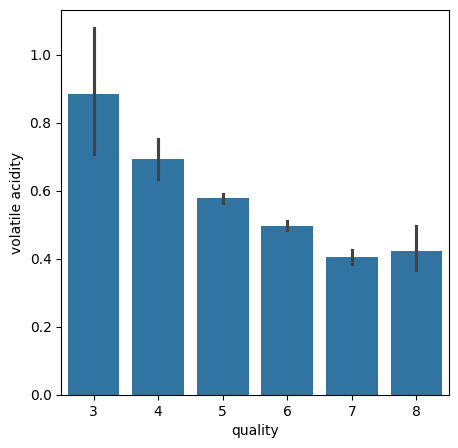

In [11]:
#quality vs volatile acidity
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data= wine_data)

<Axes: xlabel='quality', ylabel='citric acid'>

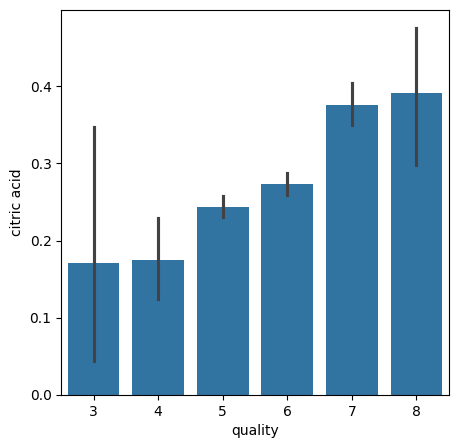

In [13]:
#quality vs citric acid
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data= wine_data)

In [14]:
correlation = wine_data.corr()

<Axes: >

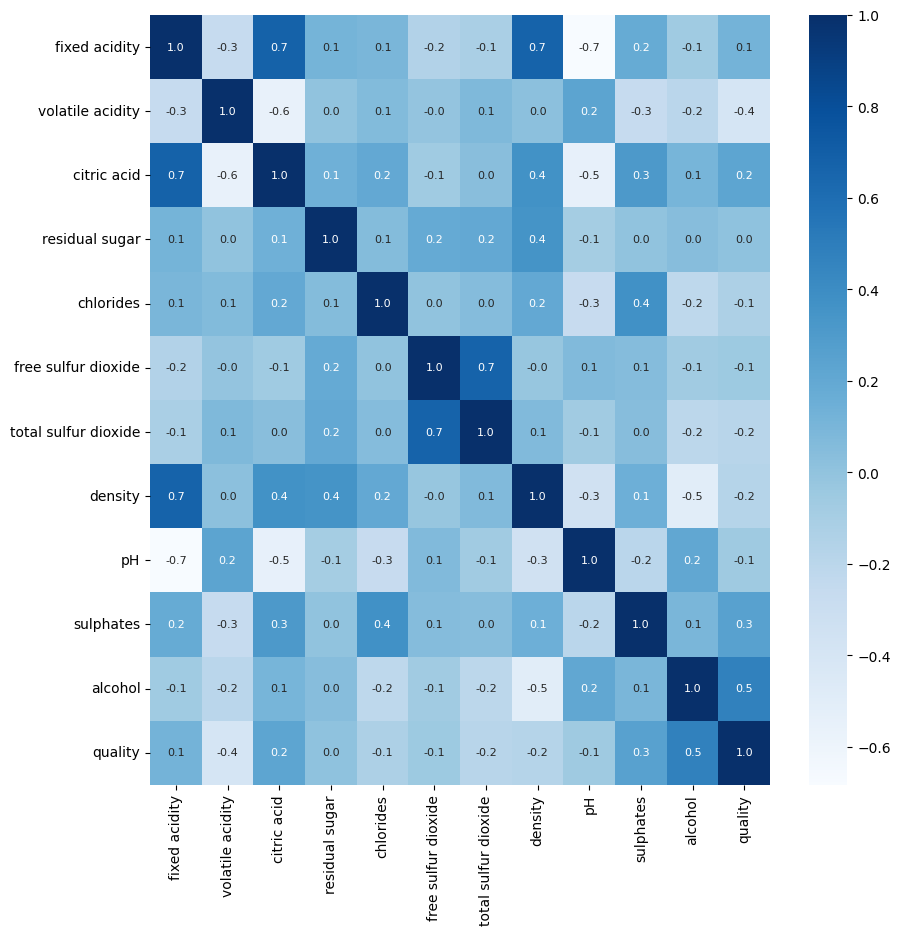

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, fmt='0.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [18]:
#data preprocessing
X = wine_data.drop(columns='quality', axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [23]:
# label binarization
y = wine_data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)#1-->good, 0-->bad

In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

Model Training:

Decision tree

In [26]:
model = RandomForestClassifier()

In [27]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
y_pred = model.predict(X_train)

In [30]:
accuracy_train = accuracy_score(y_pred, y_train)
accuracy_train

1.0

In [31]:
y_pred_test = model.predict(X_test)

In [32]:
test_accuracy = accuracy_score(y_pred_test, y_test)

In [33]:
test_accuracy

0.9375

Model lodistic regression


In [34]:
from sklearn.linear_model import LogisticRegression

In [37]:
classifier = LogisticRegression(max_iter=10000)

In [45]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [46]:
Y_pred_log = classifier.predict(X_train)

In [47]:
log_accuracy = accuracy_score(Y_pred_log, y_train)
log_accuracy

0.8756841282251759

Model SVM 


In [43]:
from sklearn.svm import SVC


In [56]:
svm_model = SVC(kernel='poly')

In [57]:
svm_model.fit(X_train, y_train)

SVC(kernel='poly')

In [58]:
y_pred_svm = svm_model.predict(X_train)

In [59]:
svm_accuracy = accuracy_score(y_pred_svm, y_train)
svm_accuracy

0.8655199374511336